In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# importing the dataset
car_df = pd.read_csv("/content/car data.csv")

In [3]:
print(car_df.columns)


Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')


In [4]:
# display the first few rows of the dataset
car_df.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
# display some basic information about the dataset
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# check for missing values
car_df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [7]:
# check for duplicate values
car_df.duplicated().sum()

# drop the duplicate values
car_df.drop_duplicates(inplace=True)
car_df.duplicated().sum()

0

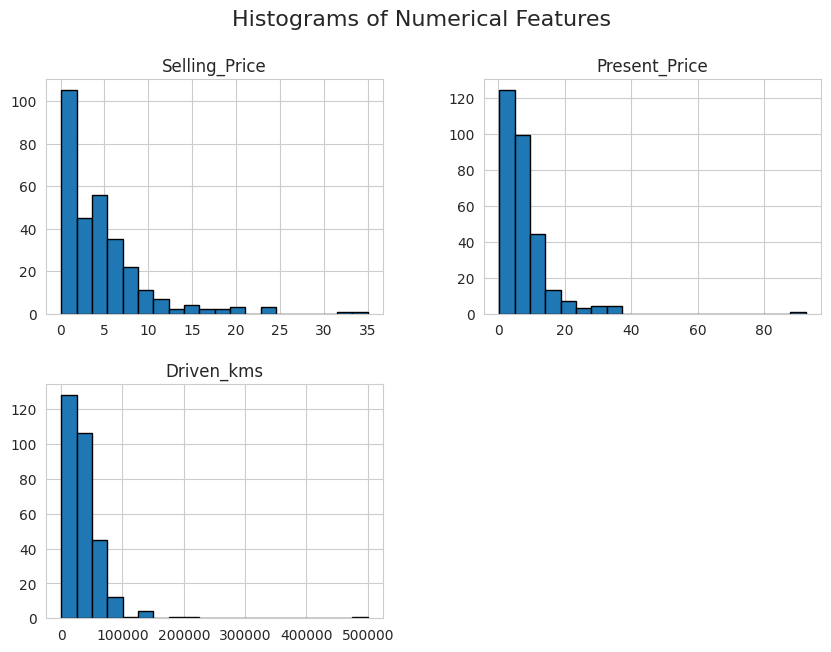

In [8]:
# Histogram

sns.set_style("whitegrid")

# plot histogram for numerical coulumns
car_df[['Selling_Price', 'Present_Price', 'Driven_kms']].hist(bins=20, figsize=(10, 7), edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

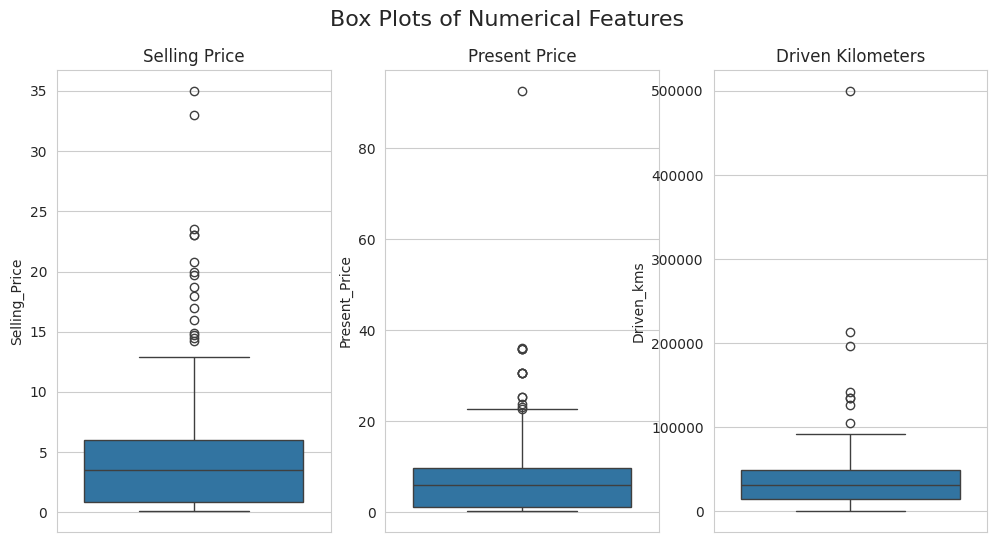

In [9]:
# Box plot to visualize outliers in numerical columns
plt.figure(figsize=(12, 6))

# Subplot for each numerical feature
plt.subplot(1, 3, 1)
sns.boxplot(y=car_df['Selling_Price'])
plt.title('Selling Price')

plt.subplot(1, 3, 2)
sns.boxplot(y=car_df['Present_Price'])
plt.title('Present Price')

plt.subplot(1, 3, 3)
sns.boxplot(y=car_df['Driven_kms'])
plt.title('Driven Kilometers')

plt.suptitle('Box Plots of Numerical Features', fontsize=16)
plt.show()


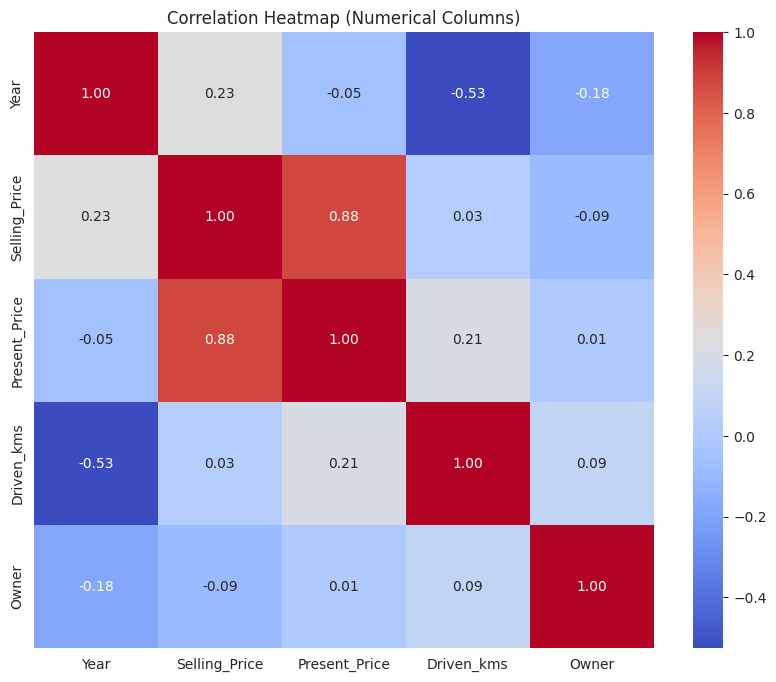

In [10]:
# Select numerical columns
numeric_columns = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']

# numeric dataframe
numeric_df = car_df[numeric_columns]

# correlation matrix for numerical columns
correlation_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Columns)')
plt.show()


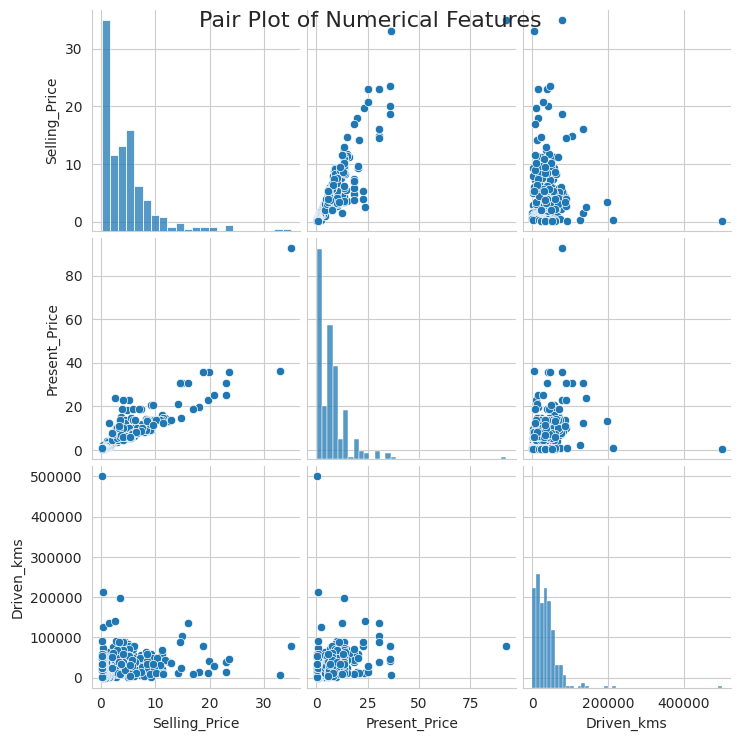

In [11]:
# Pair plot to visualize relationships between numerical features
sns.pairplot(car_df[['Selling_Price', 'Present_Price', 'Driven_kms']])
plt.suptitle('Pair Plot of Numerical Features', fontsize=16)
plt.show()


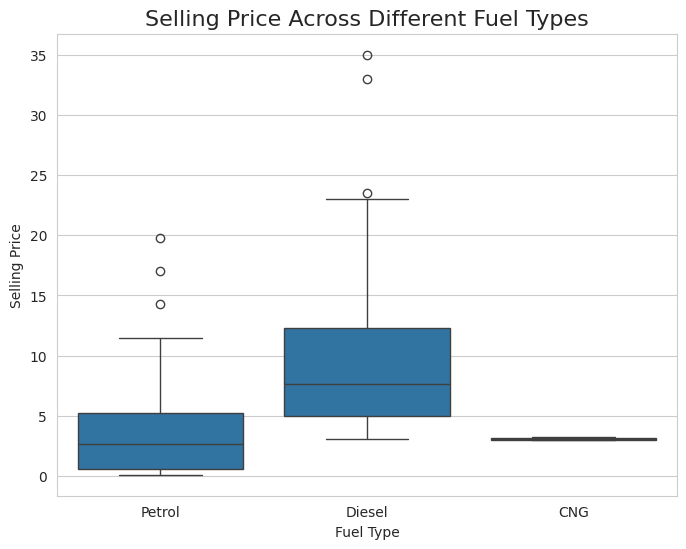

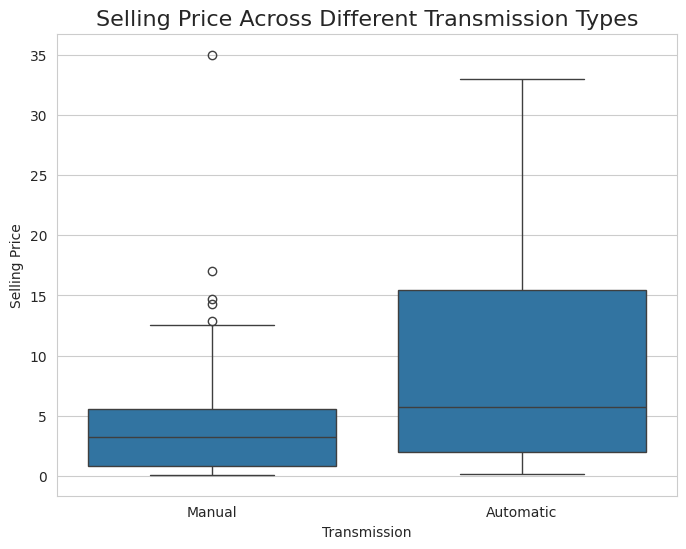

In [12]:
# Box plot for Selling Price across different Fuel Types
plt.figure(figsize=(8, 6))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=car_df)
plt.title('Selling Price Across Different Fuel Types', fontsize=16)
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.show()

# Box plot for Selling Price across different Transmission Types
plt.figure(figsize=(8, 6))
sns.boxplot(x='Transmission', y='Selling_Price', data=car_df)
plt.title('Selling Price Across Different Transmission Types', fontsize=16)
plt.xlabel('Transmission')
plt.ylabel('Selling Price')
plt.show()


<ipython-input-13-692f85545ab9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(car_df['Selling_Price'], kde=True, bins=30)


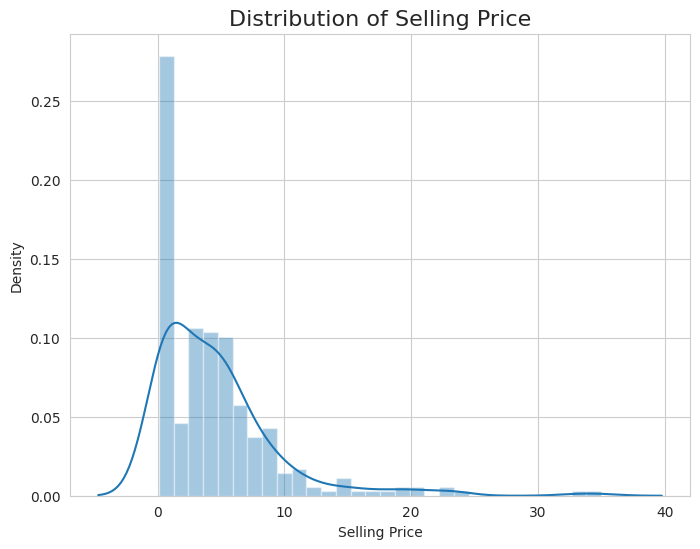

In [13]:
# Distribution plot with KDE for Selling Price
plt.figure(figsize=(8, 6))
sns.distplot(car_df['Selling_Price'], kde=True, bins=30)
plt.title('Distribution of Selling Price', fontsize=16)
plt.xlabel('Selling Price')
plt.ylabel('Density')
plt.show()


In [14]:
# data cleaning and preprocessing
# handeling categorial variable

# One-hot encoding of categorical variables
car_df = pd.get_dummies(car_df, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)


In [15]:
# Create a new feature 'Car_Age'
car_df['Car_Age'] = 2024 - car_df['Year']

# Drop the 'Year' and 'Car_Name' columns as they are no longer needed
car_df = car_df.drop(['Year', 'Car_Name'], axis=1)


In [16]:
# Separate features and target variable
X = car_df.drop('Selling_Price', axis=1)
y = car_df['Selling_Price']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [18]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
print("Linear Regression - R^2 Score:", r2_score(y_test, y_pred_lr))
print("Linear Regression - RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print('Mean squared eroor', mean_squared_error(y_test, y_pred_lr))



Linear Regression - R^2 Score: 0.7527233824220501
Linear Regression - RMSE: 2.5245049230018686
Mean squared eroor 6.37312510626067


In [19]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest - R^2 Score:", r2_score(y_test, y_pred_rf))
print("Random Forest - RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Random Forest - R^2 Score: 0.5657284202780172
Random Forest - RMSE: 3.3455336345392412
